In [1]:
import pandas as pd
import os
import utility


In [2]:
#import data: 
datapath = os.getcwd() + '/Data/'
df = pd.read_csv(datapath + 'combined-2.csv')

In [3]:
utility.summary(df)
#utility.df_info(df)

data shape: (3054427, 19)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
date,object,0,0.000000,1755,NaN,NaN,2013-01-01,2013-01-01,2013-01-01
year,int64,0,0.000000,6,2012.0,2017.0,2013,2013,2013
month,int64,0,0.000000,12,1.0,12.0,1,1,1
day,int64,0,0.000000,31,1.0,31.0,1,1,1
day_of_the_week,object,0,0.000000,7,NaN,NaN,Tuesday,Tuesday,Tuesday
store_nbr,float64,79,0.002586,54,1.0,54.0,1.0,1.0,1.0
family,object,79,0.002586,33,NaN,NaN,AUTOMOTIVE,BABY CARE,BEAUTY
sales,float64,79,0.002586,379610,0.0,124717.0,0.0,0.0,0.0
transactions,float64,249196,8.158519,4993,5.0,8359.0,NaN,NaN,NaN
onpromotion,float64,79,0.002586,362,0.0,741.0,0.0,0.0,0.0


In [18]:
df.type_hol.unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [41]:
#Clean the data, only show the holidays and city 
df_hol = df[pd.notna(df.type_hol)]
df_hol = df_hol[['date', 'year','month','day','day_of_the_week','type_hol','loc/nat','transferred','city','state']]
df_hol = df_hol.drop_duplicates() 

,date,year,month,day,day_of_the_week,type_hol,loc/nat,transferred,city,state
0,2013-01-01,2013,1,1,Tuesday,Holiday,National,False,Quito,Pichincha
132,2013-01-05,2013,1,5,Saturday,Work Day,National,False,Quito,Pichincha
363,2013-01-12,2013,1,12,Saturday,Work Day,National,False,Quito,Pichincha
1353,2013-02-11,2013,2,11,Monday,Holiday,National,False,Quito,Pichincha
1386,2013-02-12,2013,2,12,Tuesday,Holiday,National,False,Quito,Pichincha
...,...,...,...,...,...,...,...,...,...,...
3054422,2017-12-22,2017,12,22,Friday,Additional,National,False,NaN,NaN
3054423,2017-12-23,2017,12,23,Saturday,Additional,National,False,NaN,NaN
3054424,2017-12-24,2017,12,24,Sunday,Additional,National,False,NaN,NaN
3054425,2017-12-25,2017,12,25,Monday,Holiday,National,False,NaN,NaN


In [63]:
# Check for august first 
aug_hol = df_hol[(df_hol.month == 8) & (df_hol.day > 15)]
aug_hol = aug_hol[pd.notna(aug_hol.city)] # Drop the nan values 
aug_hol.day.unique()
#aug_hol['loc/nat'].unique()

array([24])

In [88]:
len(aug_hol.city.unique())


22

In [94]:
cities = aug_hol.city.unique()
# How many stores are affected ? 
len(df[df.city.isin(cities)].store_nbr.unique())

54

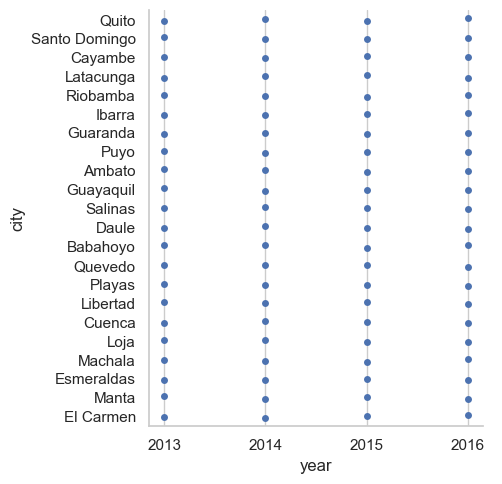

In [86]:
# Plot this as a cluster
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

#Check if all the city celebrate it every year)
df_plot = aug_hol[['year','city']]
ax = sns.catplot(x = 'year', y = 'city',data = df_plot)
ax.set(xticks = [2013, 2014, 2015, 2016])


# Observation
For kaggle competition purposes: 

We only have to predict for 2017 Aug 16 - Aug 31, only **Aug 24** is a local holiday. 

And it is a **Thursday**. 

22 cities are affected, with 54 stores. 